In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

import os, sys

lib_path = os.path.abspath(os.path.join('..'))
sys.path.append(lib_path)

from usa.reader import ReadFromCSV
from usa.classifier import ClassifierBySequencePatterns, ClassifierByClosureSequencePatterns
from usa.metrics import accuracy_score_with_unclassified_objects, tpr_fpr_nonclass, f1_score_nonclass

%matplotlib inline

In [2]:
file_name = '/Users/danil.gizdatullin/git_projects/HSE/UnbrokenSequenceAnalysis/examples/data/full_data_shuffle.csv'
coding_dict={'work': 1, 'separation': 2, 'partner': 3,
             'marriage': 4, 'children': 5, 'parting': 6,
             'divorce': 7, 'education': 8}

reader = ReadFromCSV(file_name, coding_dict)

data, label = reader.from_file_to_data_list()

size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [3]:
len(X_train) * 0.0003

0.9614999999999999

### Threshold for Growth Rate

In [10]:
y_pred_list = []
# for i in (1.00001, 1.5, 2, 5, 10):
for i in scipy.linspace(1, 10, 40):
    origin_classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                            threshold_for_rules=0.001,
                                                            threshold_for_growth_rate=i)
    origin_classifier.fit(X_train, y_train)
    y_pred = origin_classifier.predict(X_test)
    y_pred_list.append(y_pred)

Median = 1.558812
Median = 1.784847
Median = 1.894253
Median = 2.111650
Median = 2.367816
Median = 2.460532
Median = 2.367816
Median = 2.943513
Median = 3.078161
Median = 3.167476
Median = 3.314943
Median = 4.223301
Median = 3.551724
Median = 4.223301
Median = 3.630651
Median = 4.223301
Median = 3.906897
Median = 4.223301
Median = 3.906897
Median = 4.223301
Median = 4.262069
Median = 4.223301
Median = 5.209195
Median = 4.223301
Median = 5.209195
Median = 4.223301
Median = 6.629885
Median = 4.223301
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.103448
Median = 6.334951
Median = 7.340230
Median = 6.334951
Median = 7.340230
Median = 10.558252
Median = 7.577011
Median = 10.558252
Median = 7.577011
Median = 10.558252
Median = 8.997701
Median 

In [11]:
accuracy = []
tpr_fpr = []
f1 = []

for i in y_pred_list:
    cur_accuracy = accuracy_score_with_unclassified_objects(y_test, i)
    cur_f1 = f1_score_nonclass(y_test, i)
    cur_tpr_fpr = tpr_fpr_nonclass(y_test, i)
    accuracy.append(cur_accuracy)
    f1.append(cur_f1)
    tpr_fpr.append(cur_tpr_fpr)

[[694 436]
 [238 276]]
[[616 450]
 [203 284]]
[[473 352]
 [145 220]]
[[407 305]
 [108 201]]
[[307 235]
 [ 83 149]]
[[292 163]
 [ 80 107]]
[[269 146]
 [ 71  87]]
[[252 114]
 [ 64  59]]
[[219  95]
 [ 58  56]]
[[219  95]
 [ 58  56]]
[[187  82]
 [ 55  45]]
[[181  70]
 [ 53  38]]
[[171  58]
 [ 50  34]]
[[145  48]
 [ 43  29]]
[[145  24]
 [ 41  21]]
[[138  24]
 [ 41  21]]
[[138  24]
 [ 41  21]]
[[133  24]
 [ 40  21]]
[[133  24]
 [ 40  21]]
[[124  22]
 [ 39  18]]
[[124  22]
 [ 39  18]]
[[124  20]
 [ 39  18]]
[[124  20]
 [ 39  18]]
[[119  20]
 [ 38  18]]
[[119   7]
 [ 38   7]]
[[118   7]
 [ 38   7]]
[[118   7]
 [ 38   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[107   7]
 [ 34   7]]
[[98  7]
 [29  7]]
[[98  7]
 [29  7]]
[[98  7]
 [29  7]]


In [12]:
print tpr_fpr

[(0.53696498054474706, 0.38584070796460179, 8), (0.58316221765913756, 0.42213883677298314, 99), (0.60273972602739723, 0.42666666666666669, 462), (0.65048543689320393, 0.42837078651685395, 631), (0.64224137931034486, 0.43357933579335795, 878), (0.57219251336898391, 0.35824175824175825, 1010), (0.55063291139240511, 0.35180722891566263, 1079), (0.47967479674796748, 0.31147540983606559, 1163), (0.49122807017543857, 0.30254777070063693, 1224), (0.49122807017543857, 0.30254777070063693, 1224), (0.45000000000000001, 0.30483271375464682, 1283), (0.4175824175824176, 0.2788844621513944, 1310), (0.40476190476190477, 0.25327510917030566, 1339), (0.40277777777777779, 0.24870466321243523, 1387), (0.33870967741935482, 0.14201183431952663, 1421), (0.33870967741935482, 0.14814814814814814, 1428), (0.33870967741935482, 0.14814814814814814, 1428), (0.34426229508196721, 0.15286624203821655, 1434), (0.34426229508196721, 0.15286624203821655, 1434), (0.31578947368421051, 0.15068493150684931, 1449), (0.315789

In [13]:
fpr = []
tpr = []
for i in tpr_fpr:
    tpr.append(i[0])
    fpr.append(i[1])

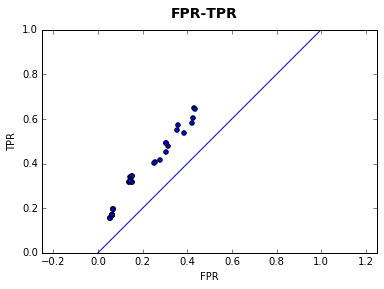

In [25]:
fig = plt.figure()
fig.suptitle('FPR-TPR', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
x = scipy.linspace(0, 1, 100)
y = x[:]

n = len(fpr)
ax.scatter(fpr, tpr)

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.plot(x, y)
ax.axis('equal')
ax.axis([0, 1, 0, 1])

plt.show()

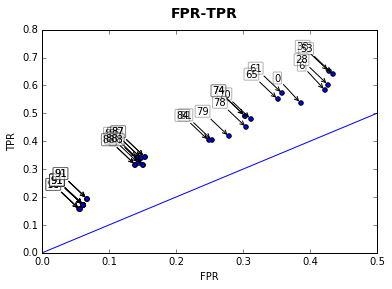

In [47]:
fig = plt.figure()
fig.suptitle('FPR-TPR', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
x = scipy.linspace(0, 1, 100)
y = x[:]

n = len(fpr)
ax.scatter(fpr, tpr)
ax.plot(x, y)
n_of_test_objects = float(len(X_test))
# labels = [str(i) for i in xrange(len(fpr))]
labels = ["%.0f" % (i[2]/n_of_test_objects*100) for i in tpr_fpr]
for label, x, y in zip(labels, fpr, tpr):
    ax.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'white', alpha = 0.3),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
# ax.axis('equal')
ax.axis([0, 0.5, 0, 0.8])

plt.show()

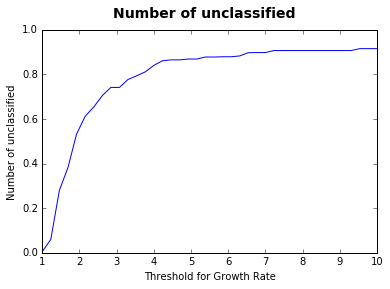

In [48]:
fig = plt.figure()
fig.suptitle('Number of unclassified', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
x = scipy.linspace(1, 10, 40)
y = [(i[2]/n_of_test_objects) for i in tpr_fpr]

ax.set_xlabel("Threshold for Growth Rate")
ax.set_ylabel("Number of unclassified")
ax.plot(x, y)
# ax.axis('equal')
# ax.axis([0, 1, 0, 1])

plt.show()

### Threshold for Rules

In [9]:
y_pred_list = []

for i in scipy.linspace(0.0003, 0.056, 40):
    origin_classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                            threshold_for_rules=i,
                                                            threshold_for_growth_rate=1.25)
    origin_classifier.fit(X_train, y_train)
    y_pred = origin_classifier.predict(X_test)
    y_pred_list.append(y_pred)

Median = 1.894253
Median = 2.111650
Median = 1.917931
Median = 2.111650
Median = 2.131034
Median = 2.006068
Median = 2.052107
Median = 1.992870
Median = 2.036322
Median = 1.823698
Median = 2.036322
Median = 1.838896
Median = 1.941609
Median = 1.838896
Median = 2.178391
Median = 1.838896
Median = 1.894253
Median = 1.826898
Median = 1.852468
Median = 1.823698
Median = 1.810683
Median = 1.737712
Median = 1.805112
Median = 1.737712
Median = 1.792775
Median = 1.737712
Median = 1.690358
Median = 1.596614
Median = 1.690358
Median = 1.656165
Median = 1.690358
Median = 1.715716
Median = 1.690358
Median = 1.656165
Median = 1.618008
Median = 1.596614
Median = 1.618008
Median = 1.577606
Median = 1.690358
Median = 1.596614
Median = 1.690358
Median = 1.656165
Median = 1.618008
Median = 1.781705
Median = 1.618008
Median = 1.715716
Median = 1.528118
Median = 1.715716
Median = 1.528118
Median = 1.715716
Median = 1.528118
Median = 1.487754
Median = 1.438229
Median = 1.487754
Median = 1.420690
Median = 1

In [10]:
accuracy = []
tpr_fpr = []
f1 = []

for i in y_pred_list:
    cur_accuracy = accuracy_score_with_unclassified_objects(y_test, i)
    cur_f1 = f1_score_nonclass(y_test, i)
    cur_tpr_fpr = tpr_fpr_nonclass(y_test, i)
    accuracy.append(cur_accuracy)
    f1.append(cur_f1)
    tpr_fpr.append(cur_tpr_fpr)

[[638 389]
 [210 253]]
[[582 413]
 [191 263]]
[[535 412]
 [180 262]]
[[516 413]
 [170 264]]
[[505 404]
 [155 273]]
[[486 395]
 [143 274]]
[[461 394]
 [127 273]]
[[392 425]
 [113 278]]
[[382 425]
 [109 278]]
[[353 417]
 [102 273]]
[[353 417]
 [102 273]]
[[353 408]
 [102 268]]
[[353 408]
 [102 268]]
[[320 422]
 [ 89 276]]
[[320 422]
 [ 89 276]]
[[320 422]
 [ 89 276]]
[[320 422]
 [ 89 276]]
[[268 422]
 [ 70 276]]
[[268 422]
 [ 70 276]]
[[268 422]
 [ 70 276]]
[[268 422]
 [ 70 276]]
[[268 398]
 [ 70 256]]
[[236 398]
 [ 63 256]]
[[191 443]
 [ 55 264]]
[[191 443]
 [ 55 264]]
[[191 428]
 [ 55 241]]
[[152 428]
 [ 50 241]]
[[ 64 428]
 [ 25 241]]
[[ 64 428]
 [ 25 241]]
[[ 64 428]
 [ 25 241]]
[[ 64 428]
 [ 25 241]]
[[ 64 393]
 [ 25 215]]
[[ 64 393]
 [ 25 215]]
[[ 64 351]
 [ 25 202]]
[[ 64 351]
 [ 25 202]]
[[ 64 351]
 [ 25 202]]
[[ 64 305]
 [ 25 172]]
[[ 64 305]
 [ 25 172]]
[[ 64 265]
 [ 25 152]]
[[ 64 265]
 [ 25 152]]


In [11]:
fpr = []
tpr = []
for i in tpr_fpr:
    tpr.append(i[0])
    fpr.append(i[1])

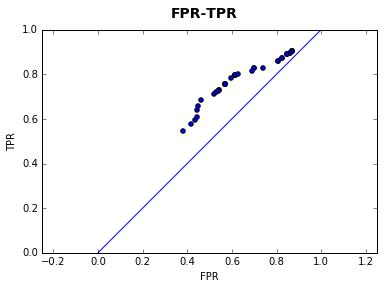

In [12]:
fig = plt.figure()
fig.suptitle('FPR-TPR', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
x = scipy.linspace(0, 1, 100)
y = x[:]

n = len(fpr)
ax.scatter(fpr, tpr)

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.plot(x, y)
ax.axis('equal')
ax.axis([0, 1, 0, 1])

plt.show()

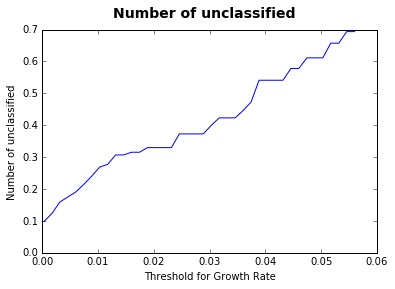

In [14]:
fig = plt.figure()
fig.suptitle('Number of unclassified', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
x = scipy.linspace(0.0003, 0.056, 40)
n_of_test_objects = float(len(X_test))
y = [(i[2]/n_of_test_objects) for i in tpr_fpr]

ax.set_xlabel("Threshold for Growth Rate")
ax.set_ylabel("Number of unclassified")
ax.plot(x, y)
# ax.axis('equal')
# ax.axis([0, 1, 0, 1])

plt.show()